# Unzip Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!unzip Training.zip 
!unzip Testing.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Testing/Happy/Happy-1078.jpg  
  inflating: Testing/Happy/Happy-1079.jpg  
  inflating: Testing/Happy/Happy-108.jpg  
  inflating: Testing/Happy/Happy-1080.jpg  
  inflating: Testing/Happy/Happy-1081.jpg  
  inflating: Testing/Happy/Happy-1082.jpg  
  inflating: Testing/Happy/Happy-1083.jpg  
  inflating: Testing/Happy/Happy-1084.jpg  
  inflating: Testing/Happy/Happy-1085.jpg  
  inflating: Testing/Happy/Happy-1086.jpg  
  inflating: Testing/Happy/Happy-1087.jpg  
  inflating: Testing/Happy/Happy-1088.jpg  
  inflating: Testing/Happy/Happy-1089.jpg  
  inflating: Testing/Happy/Happy-109.jpg  
  inflating: Testing/Happy/Happy-1090.jpg  
  inflating: Testing/Happy/Happy-1091.jpg  
  inflating: Testing/Happy/Happy-1092.jpg  
  inflating: Testing/Happy/Happy-1093.jpg  
  inflating: Testing/Happy/Happy-1094.jpg  
  inflating: Testing/Happy/Happy-1095.jpg  
  inflating: Testing/Happy/Happy-1096.jpg  
  inflating: Testing/Happy/Happ

# Import Libraries


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalMaxPool2D
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications import DenseNet121
from keras.applications import DenseNet169
from pylab import cm

# Dataset Processing and Analysis

Total training samples:  28273
Total testing samples:  7067
         train  test
Fear      4097  1024
Suprise   3171   831
Sad       4830  1247
Neutral   4965  1233
Angry     3995   958
Happy     7215  1774


<Figure size 432x288 with 0 Axes>

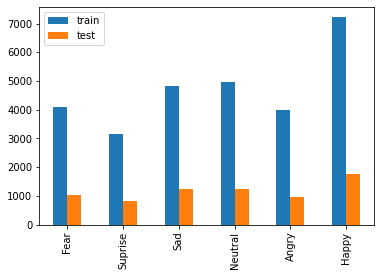

In [ ]:
# get the dataset folders
# /content/drive/My Drive/Colab Notebooks/464 Project
data_root = './'
train_folder = os.path.join(data_root, 'Training')
test_folder = os.path.join(data_root, 'Testing')

total_train = 0
total_test = 0

train_dict = dict()
test_dict = dict()

# print information regarding training and testing sample numbers
for i in os.listdir(train_folder):
  total_train += len(os.listdir(train_folder +  '/' + i))
  train_dict[i] = len(os.listdir(train_folder +  '/' + i))
print("Total training samples: ", total_train)

for i in os.listdir(test_folder):
  total_test += len(os.listdir(test_folder +  '/' + i))
  test_dict[i] = len(os.listdir(test_folder +  '/' + i))
print("Total testing samples: ", total_test)

samples_df = pd.DataFrame({'train':train_dict, 'test': test_dict})
print(samples_df)
plt.figure()
samples_df.plot.bar()

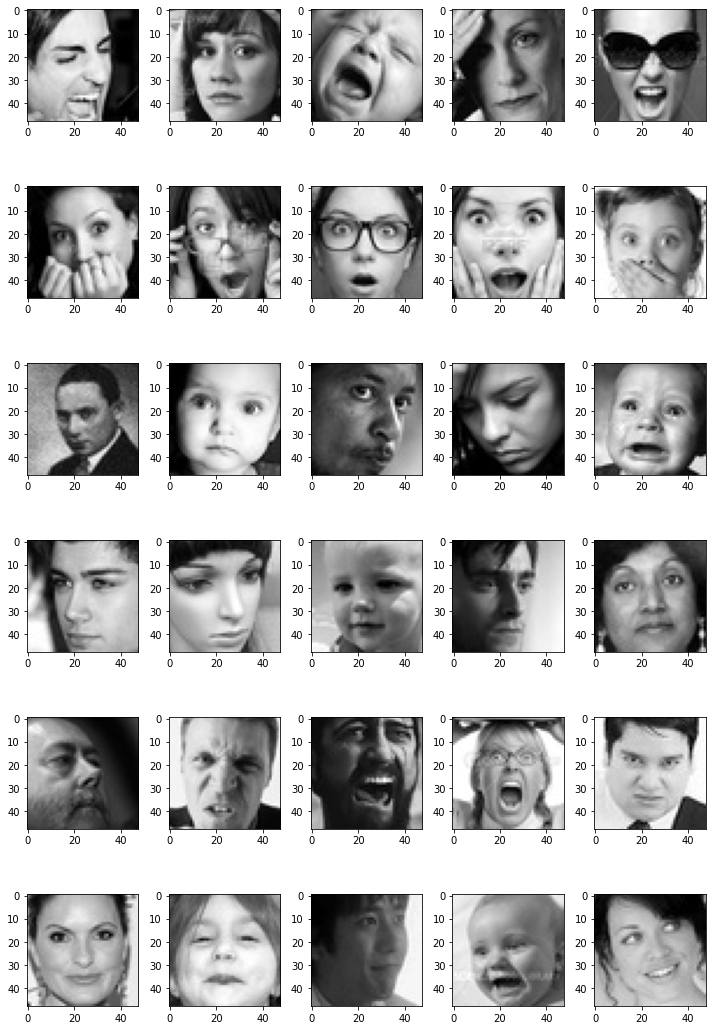

In [ ]:
# display sample training images for each emotion
plt.figure(0, figsize=(10,15))
sub_num = 0
for i in os.listdir(train_folder):
  for k in range(5):
    sub_num += 1
    plt.subplot(6, 5, sub_num)
    plt.imshow(mpimg.imread(train_folder + '/' + i + '/'  + os.listdir(train_folder + '/' + i)[k]), cmap='gray')

plt.tight_layout()
plt.show()

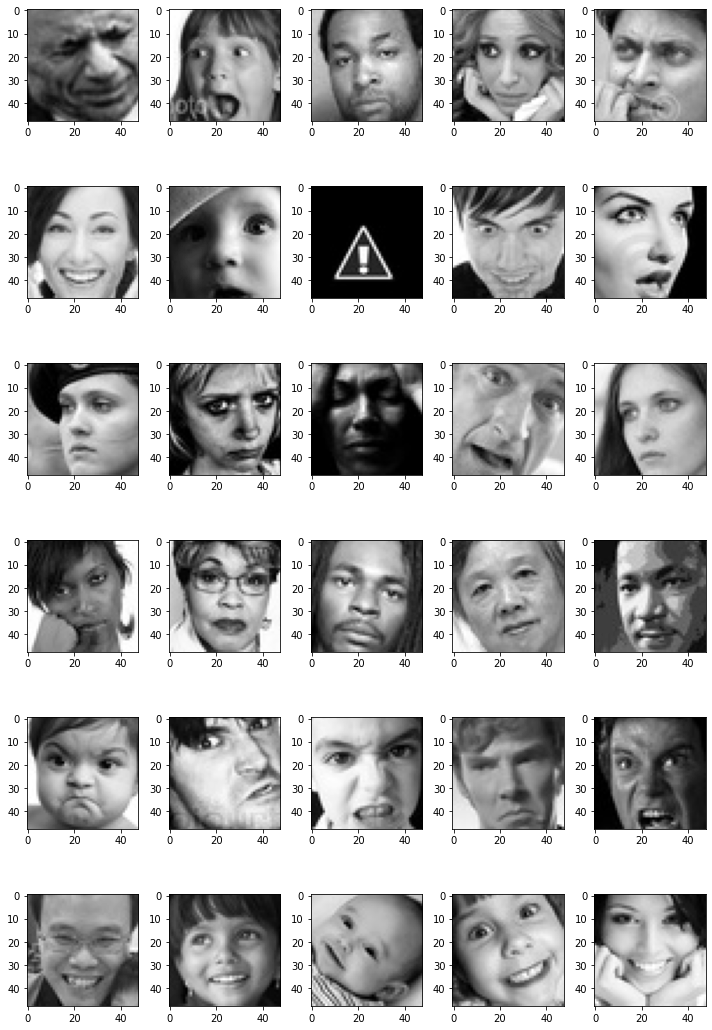

In [ ]:
# display sample test images for each emotion
plt.figure(0, figsize=(10,15))
sub_num = 0
for i in os.listdir(test_folder):
  for k in range(5):
    sub_num += 1
    plt.subplot(6, 5, sub_num)
    plt.imshow(mpimg.imread(test_folder + '/' + i + '/'  + os.listdir(test_folder + '/' + i)[k]), cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
''' 
# Use ZCA (akin to PCA) which preserves the spatial arrangement of the pixels which is very important 
  when using Convolutional Neural Networks for Deep Learning
'''
# mean-center, standardize, and normalize training images
train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
train_data = train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center, standardize, and normalize testing images
test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
test_data = test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# resize the training and test data for inception, as it does not accept sizes under 75x75
inc_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
inc_train_data = inc_train_data.flow_from_directory(train_folder, seed=117, target_size = (75,75), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')
# processing parameters
inc_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
inc_test_data = inc_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (75,75), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

#vgg data:
vgg_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
vgg_train_data = vgg_train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='rgb', batch_size=64, class_mode = 'categorical')

vgg_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = True)
vgg_test_data = vgg_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='rgb', batch_size=64, class_mode = 'categorical')


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


# Layer Visualization Method

In [ ]:
def visualize_data(data, met_model, num_images=1, step_size=1, layers=7):
  for k in range(0, num_images):    #Visualizing layers over test_data with step_size 25
    test = data[k]
    fig = plt.figure()
    for i in range(layers):
      model = Model(inputs = met_model.inputs, outputs = met_model.layers[i * step_size].output)
      layer_output = model.predict(test[0])[0,:,:,:]
      ax = fig.add_subplot(1, layers, i+1)
      ax.matshow(layer_output[:,:,0], cmap=cm.gray)
      plt.xticks(np.array([]))
      plt.yticks(np.array([]))
    plt.show()

# Model Training and Evaluation

## ResNet

### ResNet50V2

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
res50_model_1 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_1.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_1.fit(train_data, epochs=10)

# evaluate on test set
res50_model_1.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 46s 68ms/step - loss: 2.7626 - accuracy: 0.2419 - top_k_categorical_accuracy: 0.4239
Epoch 2/10
442/442 [==============================] - 30s 67ms/step - loss: 1.6100 - accuracy: 0.3452 - top_k_categorical_accuracy: 0.5321
Epoch 3/10
442/442 [==============================] - 30s 67ms/step - loss: 1.4459 - accuracy: 0.4282 - top_k_categorical_accuracy: 0.6105
Epoch 4/10
442/442 [==============================] - 30s 68ms/step - loss: 1.3306 - accuracy: 0.4739 - top_k_categorical_accuracy: 0.6771
Epoch 5/10
442/442 [==============================] - 30s 68ms/step - loss: 1.3041 - accuracy: 0.5014 - top_k_categorical_accuracy: 0.7042
Epoch 6/10
442/442 [==============================] - 31s 69ms/step - loss: 1.2264 - accuracy: 0.5215 - top_k_categorical_accuracy: 0.7229
Epoch 7/10
442/442 [==============================] - 30s 69ms/step - loss: 1.1611 - accuracy: 0.5511 - top_k_categorical_accuracy: 0.7486
Epoch 8/10
442/442 [=======

[1.4654607772827148, 0.4772888123989105, 0.6714305877685547]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


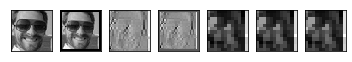

In [ ]:
visualize_data(test_data, res50_model_1, num_images=1, layers=7)

In [ ]:
# plot base resnet 50 model
from keras.utils import plot_model
plt = plot_model(res50_model_1, to_file='res50_model_1.png')

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 15 epochs  --
res50_model_2 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_2.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_2.fit(train_data, epochs=15)
# evaluate on test set
res50_model_2.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 53s 100ms/step - loss: 2.5216 - accuracy: 0.2352 - top_k_categorical_accuracy: 0.4161
Epoch 2/15
442/442 [==============================] - 44s 100ms/step - loss: 1.6687 - accuracy: 0.3116 - top_k_categorical_accuracy: 0.4948
Epoch 3/15
442/442 [==============================] - 44s 100ms/step - loss: 1.4572 - accuracy: 0.4134 - top_k_categorical_accuracy: 0.6103
Epoch 4/15
442/442 [==============================] - 44s 100ms/step - loss: 1.3554 - accuracy: 0.4619 - top_k_categorical_accuracy: 0.6671
Epoch 5/15
442/442 [==============================] - 44s 100ms/step - loss: 1.2712 - accuracy: 0.4979 - top_k_categorical_accuracy: 0.6943
Epoch 6/15
442/442 [==============================] - 44s 100ms/step - loss: 1.2119 - accuracy: 0.5254 - top_k_categorical_accuracy: 0.7245
Epoch 7/15
442/442 [==============================] - 44s 100ms/step - loss: 1.1569 - accuracy: 0.5493 - top_k_categorical_accuracy: 0.7462
Epoch 8/15
442/442 [

[1.3961412906646729, 0.5503042340278625, 0.7409084439277649]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=1, categorical_crossentropy, 10 epochs  --
res50_model_3 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_3.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_3.fit(train_data, epochs=10)
# evaluate on test set
res50_model_3.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 53s 100ms/step - loss: 183.0311 - accuracy: 0.2041 - top_k_categorical_accuracy: 0.4088
Epoch 2/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9129 - accuracy: 0.1991 - top_k_categorical_accuracy: 0.3784
Epoch 3/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9023 - accuracy: 0.2038 - top_k_categorical_accuracy: 0.3805
Epoch 4/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9073 - accuracy: 0.2069 - top_k_categorical_accuracy: 0.3813
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9108 - accuracy: 0.2004 - top_k_categorical_accuracy: 0.3822
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9149 - accuracy: 0.2011 - top_k_categorical_accuracy: 0.3715
Epoch 7/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9098 - accuracy: 0.1983 - top_k_categorical_accuracy: 0.3752
Epoch 8/10
442/442

[2.2024433612823486, 0.14546483755111694, 0.3207867443561554]

In [ ]:
# train with -- random weights, pooling None, SGD, lr=0.01, categorical_crossentropy, 10 epochs  --
res50_model_4 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_4.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_4.fit(train_data, epochs=10)
# evaluate on test set
res50_model_4.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 41s 83ms/step - loss: 1.7880 - accuracy: 0.2444 - top_k_categorical_accuracy: 0.4361
Epoch 2/10
442/442 [==============================] - 37s 84ms/step - loss: 1.6487 - accuracy: 0.3284 - top_k_categorical_accuracy: 0.5301
Epoch 3/10
442/442 [==============================] - 37s 83ms/step - loss: 1.5238 - accuracy: 0.3934 - top_k_categorical_accuracy: 0.5939
Epoch 4/10
442/442 [==============================] - 37s 83ms/step - loss: 1.4036 - accuracy: 0.4527 - top_k_categorical_accuracy: 0.6584
Epoch 5/10
442/442 [==============================] - 37s 83ms/step - loss: 1.3033 - accuracy: 0.4976 - top_k_categorical_accuracy: 0.6983
Epoch 6/10
442/442 [==============================] - 37s 83ms/step - loss: 1.1692 - accuracy: 0.5550 - top_k_categorical_accuracy: 0.7492
Epoch 7/10
442/442 [==============================] - 37s 83ms/step - loss: 1.0792 - accuracy: 0.5951 - top_k_categorical_accuracy: 0.7844
Epoch 8/10
442/442 [=======

[1.6390104293823242, 0.4359700083732605, 0.6462430953979492]

In [ ]:
# train with -- random weights, pooling None, Adam, lr=0.01, categorical_crossentropy, 10 epochs  --
res50_model_5 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_5.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_5.fit(train_data, epochs=10)
# evaluate on test set
res50_model_5.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 88ms/step - loss: 2.3110 - accuracy: 0.2258 - top_k_categorical_accuracy: 0.4113
Epoch 2/10
442/442 [==============================] - 39s 88ms/step - loss: 1.6825 - accuracy: 0.3024 - top_k_categorical_accuracy: 0.4904
Epoch 3/10
442/442 [==============================] - 39s 88ms/step - loss: 1.5400 - accuracy: 0.3765 - top_k_categorical_accuracy: 0.5646
Epoch 4/10
442/442 [==============================] - 39s 88ms/step - loss: 1.4330 - accuracy: 0.4245 - top_k_categorical_accuracy: 0.6257
Epoch 5/10
442/442 [==============================] - 39s 88ms/step - loss: 1.3505 - accuracy: 0.4642 - top_k_categorical_accuracy: 0.6636
Epoch 6/10
442/442 [==============================] - 39s 88ms/step - loss: 1.2899 - accuracy: 0.4900 - top_k_categorical_accuracy: 0.6923
Epoch 7/10
442/442 [==============================] - 39s 88ms/step - loss: 1.2170 - accuracy: 0.5259 - top_k_categorical_accuracy: 0.7246
Epoch 8/10
442/442 [=======

[1.8376579284667969, 0.33125796914100647, 0.5440781116485596]

In [ ]:
# train with -- random weights,  RMSProp, lr=0.01, softmax, categorical_crossentropy, 10 epochs  --

res50_model_9 = ResNet50V2(weights=None, classes=6, include_top=True, classifier_activation="softmax", input_shape=(48,48,1))
res50_model_9.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_9.fit(train_data, epochs=10)
# evaluate on test set
res50_model_9.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 53s 100ms/step - loss: 2.6560 - accuracy: 0.2409 - top_k_categorical_accuracy: 0.4199
Epoch 2/10
442/442 [==============================] - 44s 100ms/step - loss: 1.6482 - accuracy: 0.3326 - top_k_categorical_accuracy: 0.5223
Epoch 3/10
442/442 [==============================] - 44s 100ms/step - loss: 1.4771 - accuracy: 0.4041 - top_k_categorical_accuracy: 0.6010
Epoch 4/10
442/442 [==============================] - 44s 100ms/step - loss: 1.3784 - accuracy: 0.4495 - top_k_categorical_accuracy: 0.6472
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 1.2904 - accuracy: 0.4946 - top_k_categorical_accuracy: 0.6933
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 1.2366 - accuracy: 0.5114 - top_k_categorical_accuracy: 0.7163
Epoch 7/10
442/442 [==============================] - 44s 100ms/step - loss: 1.1871 - accuracy: 0.5360 - top_k_categorical_accuracy: 0.7385
Epoch 8/10
442/442 [

[1.5037637948989868, 0.4512523114681244, 0.6514787077903748]

In [ ]:
# train with -- random weights, RMSProp, lr=0.01, relu, categorical_crossentropy, 10 epochs  --

res50_model_10 = ResNet50V2(weights=None, classes=6, include_top=True,classifier_activation="relu", input_shape=(48,48,1))
res50_model_10.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_10.fit(train_data, epochs=10)
# evaluate on test set
res50_model_10.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 53s 99ms/step - loss: 6.1014 - accuracy: 0.2633 - top_k_categorical_accuracy: 0.4396
Epoch 2/10
442/442 [==============================] - 44s 100ms/step - loss: 5.8396 - accuracy: 0.3525 - top_k_categorical_accuracy: 0.5170
Epoch 3/10
442/442 [==============================] - 44s 99ms/step - loss: 5.8988 - accuracy: 0.3648 - top_k_categorical_accuracy: 0.5296
Epoch 4/10
442/442 [==============================] - 44s 99ms/step - loss: 5.8400 - accuracy: 0.3927 - top_k_categorical_accuracy: 0.5538
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 5.9345 - accuracy: 0.4038 - top_k_categorical_accuracy: 0.5647
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 5.7222 - accuracy: 0.4157 - top_k_categorical_accuracy: 0.5804
Epoch 7/10
442/442 [==============================] - 44s 99ms/step - loss: 5.8927 - accuracy: 0.4190 - top_k_categorical_accuracy: 0.5781
Epoch 8/10
442/442 [====

[6.006153583526611, 0.3608320355415344, 0.5278052687644958]

In [ ]:
# train with -- random weights, RMSProp, lr=0.01, sigmoid, categorical_crossentropy, 10 epochs  --

res50_model_11 = ResNet50V2(weights=None, classes=6, include_top=True, classifier_activation="sigmoid", input_shape=(48,48,1))
res50_model_11.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_11.fit(train_data, epochs=10)
# evaluate on test set
res50_model_11.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 53s 100ms/step - loss: 2.4824 - accuracy: 0.2367 - top_k_categorical_accuracy: 0.4259
Epoch 2/10
442/442 [==============================] - 44s 100ms/step - loss: 1.7064 - accuracy: 0.2871 - top_k_categorical_accuracy: 0.4739
Epoch 3/10
442/442 [==============================] - 44s 101ms/step - loss: 1.5141 - accuracy: 0.3887 - top_k_categorical_accuracy: 0.5747
Epoch 4/10
442/442 [==============================] - 44s 100ms/step - loss: 1.4075 - accuracy: 0.4343 - top_k_categorical_accuracy: 0.6309
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 1.3330 - accuracy: 0.4700 - top_k_categorical_accuracy: 0.6723
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 1.2684 - accuracy: 0.5006 - top_k_categorical_accuracy: 0.7042
Epoch 7/10
442/442 [==============================] - 45s 101ms/step - loss: 1.2256 - accuracy: 0.5207 - top_k_categorical_accuracy: 0.7200
Epoch 8/10
442/442 [

[1.3388280868530273, 0.4835149347782135, 0.6857223510742188]

In [ ]:
# mean-center images
no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_train_data = no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_test_data = no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

res50_model_1 = ResNet50V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res50_model_1.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res50_model_1.fit(no_norm_train_data, epochs=10)

# evaluate on test set
res50_model_1.evaluate(no_norm_test_data, batch_size=64)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 54s 100ms/step - loss: 2.5784 - accuracy: 0.2359 - top_k_categorical_accuracy: 0.4184
Epoch 2/10
442/442 [==============================] - 44s 100ms/step - loss: 1.6778 - accuracy: 0.2978 - top_k_categorical_accuracy: 0.4923
Epoch 3/10
442/442 [==============================] - 44s 100ms/step - loss: 1.4965 - accuracy: 0.3965 - top_k_categorical_accuracy: 0.5897
Epoch 4/10
442/442 [==============================] - 44s 100ms/step - loss: 1.3956 - accuracy: 0.4411 - top_k_categorical_accuracy: 0.6382
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 1.3224 - accuracy: 0.4711 - top_k_categorical_accuracy: 0.6717
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 1.2526 - accuracy: 0.5048 - top_k_categorical_accuracy: 0.7071
Epoch 7/10
442/442 [==============================] - 44s 100ms/step - loss: 1.1916 - accuracy: 0.5309 - top_k_categorical_accuracy: 0.7311
Epoch 8/10
442/442 [

[1.8164860010147095, 0.3671996593475342, 0.5757747292518616]

### ResNet101V2

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
res101_model_1 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_1.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_1.fit(train_data, epochs=10)

# evaluate on test set
res101_model_1.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 98ms/step - loss: 2.0321 - accuracy: 0.2457 - top_k_categorical_accuracy: 0.4246
Epoch 2/10
442/442 [==============================] - 44s 99ms/step - loss: 1.6725 - accuracy: 0.3052 - top_k_categorical_accuracy: 0.4931
Epoch 3/10
442/442 [==============================] - 44s 99ms/step - loss: 1.5079 - accuracy: 0.3915 - top_k_categorical_accuracy: 0.5827
Epoch 4/10
442/442 [==============================] - 44s 99ms/step - loss: 1.3840 - accuracy: 0.4495 - top_k_categorical_accuracy: 0.6489
Epoch 5/10
442/442 [==============================] - 44s 100ms/step - loss: 1.3111 - accuracy: 0.4808 - top_k_categorical_accuracy: 0.6823
Epoch 6/10
442/442 [==============================] - 44s 100ms/step - loss: 1.2495 - accuracy: 0.5075 - top_k_categorical_accuracy: 0.7097
Epoch 7/10
442/442 [==============================] - 44s 100ms/step - loss: 1.1914 - accuracy: 0.5348 - top_k_categorical_accuracy: 0.7338
Epoch 8/10
442/442 [====

[1.3463151454925537, 0.47912833094596863, 0.6814773082733154]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 15 epochs  --
res101_model_2 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_2.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_2.fit(train_data, epochs=15)
# evaluate on test set
res101_model_2.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 43s 98ms/step - loss: 1.9820 - accuracy: 0.2479 - top_k_categorical_accuracy: 0.4272
Epoch 2/15
442/442 [==============================] - 44s 99ms/step - loss: 1.6193 - accuracy: 0.3320 - top_k_categorical_accuracy: 0.5257
Epoch 3/15
442/442 [==============================] - 44s 99ms/step - loss: 1.4556 - accuracy: 0.4164 - top_k_categorical_accuracy: 0.6177
Epoch 4/15
442/442 [==============================] - 44s 99ms/step - loss: 1.3731 - accuracy: 0.4527 - top_k_categorical_accuracy: 0.6560
Epoch 5/15
442/442 [==============================] - 44s 100ms/step - loss: 1.3196 - accuracy: 0.4823 - top_k_categorical_accuracy: 0.6842
Epoch 6/15
442/442 [==============================] - 44s 100ms/step - loss: 1.2757 - accuracy: 0.5038 - top_k_categorical_accuracy: 0.7065
Epoch 7/15
442/442 [==============================] - 44s 100ms/step - loss: 1.2134 - accuracy: 0.5242 - top_k_categorical_accuracy: 0.7221
Epoch 8/15
442/442 [====

[3.3939876556396484, 0.5089854001998901, 0.6977500915527344]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=1, categorical_crossentropy, 10 epochs  --
res101_model_3 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_3.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_3.fit(train_data, epochs=10)
# evaluate on test set
res101_model_3.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 99ms/step - loss: 36.1191 - accuracy: 0.1974 - top_k_categorical_accuracy: 0.3840
Epoch 2/10
442/442 [==============================] - 44s 99ms/step - loss: 1.9114 - accuracy: 0.1981 - top_k_categorical_accuracy: 0.3730
Epoch 3/10
442/442 [==============================] - 44s 99ms/step - loss: 1.9135 - accuracy: 0.1941 - top_k_categorical_accuracy: 0.3712
Epoch 4/10
442/442 [==============================] - 44s 100ms/step - loss: 1.9110 - accuracy: 0.2005 - top_k_categorical_accuracy: 0.3764
Epoch 5/10
442/442 [==============================] - 44s 99ms/step - loss: 1.9081 - accuracy: 0.2023 - top_k_categorical_accuracy: 0.3794
Epoch 6/10
442/442 [==============================] - 44s 99ms/step - loss: 1.9075 - accuracy: 0.2005 - top_k_categorical_accuracy: 0.3804
Epoch 7/10
442/442 [==============================] - 44s 99ms/step - loss: 1.9086 - accuracy: 0.2014 - top_k_categorical_accuracy: 0.3774
Epoch 8/10
442/442 [=====

[34.51166534423828, 0.17772746086120605, 0.3550304174423218]

In [ ]:
# train with -- random weights, pooling None, SGD, lr=0.01, categorical_crossentropy, 10 epochs  --
res101_model_4 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_4.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_4.fit(train_data, epochs=10)
# evaluate on test set
res101_model_4.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 37s 83ms/step - loss: 1.7719 - accuracy: 0.2575 - top_k_categorical_accuracy: 0.4526
Epoch 2/10
442/442 [==============================] - 37s 83ms/step - loss: 1.6840 - accuracy: 0.3032 - top_k_categorical_accuracy: 0.5083
Epoch 3/10
442/442 [==============================] - 37s 83ms/step - loss: 1.5886 - accuracy: 0.3609 - top_k_categorical_accuracy: 0.5586
Epoch 4/10
442/442 [==============================] - 37s 83ms/step - loss: 1.5027 - accuracy: 0.4046 - top_k_categorical_accuracy: 0.6082
Epoch 5/10
442/442 [==============================] - 37s 83ms/step - loss: 1.4191 - accuracy: 0.4457 - top_k_categorical_accuracy: 0.6469
Epoch 6/10
442/442 [==============================] - 37s 83ms/step - loss: 1.3394 - accuracy: 0.4796 - top_k_categorical_accuracy: 0.6799
Epoch 7/10
442/442 [==============================] - 37s 83ms/step - loss: 1.2514 - accuracy: 0.5152 - top_k_categorical_accuracy: 0.7168
Epoch 8/10
442/442 [=======

[1.481584072113037, 0.46667608618736267, 0.6592613458633423]

In [ ]:
# train with -- random weights, pooling None, Adam, lr=0.01, categorical_crossentropy, 10 epochs  --
res101_model_5 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_5.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_5.fit(train_data, epochs=10)
# evaluate on test set
res101_model_5.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 38s 86ms/step - loss: 1.9637 - accuracy: 0.2434 - top_k_categorical_accuracy: 0.4290
Epoch 2/10
442/442 [==============================] - 38s 86ms/step - loss: 1.7410 - accuracy: 0.2569 - top_k_categorical_accuracy: 0.4465
Epoch 3/10
442/442 [==============================] - 38s 87ms/step - loss: 1.7202 - accuracy: 0.2723 - top_k_categorical_accuracy: 0.4625
Epoch 4/10
442/442 [==============================] - 38s 86ms/step - loss: 1.6521 - accuracy: 0.3215 - top_k_categorical_accuracy: 0.5167
Epoch 5/10
442/442 [==============================] - 38s 86ms/step - loss: 1.5550 - accuracy: 0.3733 - top_k_categorical_accuracy: 0.5618
Epoch 6/10
442/442 [==============================] - 38s 86ms/step - loss: 1.4804 - accuracy: 0.4065 - top_k_categorical_accuracy: 0.6014
Epoch 7/10
442/442 [==============================] - 38s 86ms/step - loss: 1.4223 - accuracy: 0.4321 - top_k_categorical_accuracy: 0.6299
Epoch 8/10
442/442 [=======

[1.4202042818069458, 0.4529503285884857, 0.6469506025314331]

In [ ]:
# train with -- random weights, RMSProp, lr=0.01, softmax, categorical_crossentropy, 10 epochs  --

res101_model_9 = ResNet101V2(weights=None, classes=6, include_top=True, classifier_activation="softmax", input_shape=(48,48,1))
res101_model_9.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_9.fit(train_data, epochs=10)
# evaluate on test set
res101_model_9.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 43s 98ms/step - loss: 1.9768 - accuracy: 0.2466 - top_k_categorical_accuracy: 0.4216
Epoch 2/10
442/442 [==============================] - 43s 98ms/step - loss: 1.7225 - accuracy: 0.2788 - top_k_categorical_accuracy: 0.4649
Epoch 3/10
442/442 [==============================] - 43s 98ms/step - loss: 1.5769 - accuracy: 0.3595 - top_k_categorical_accuracy: 0.5552
Epoch 4/10
442/442 [==============================] - 43s 98ms/step - loss: 1.4838 - accuracy: 0.4043 - top_k_categorical_accuracy: 0.5978
Epoch 5/10
442/442 [==============================] - 43s 98ms/step - loss: 1.4017 - accuracy: 0.4341 - top_k_categorical_accuracy: 0.6317
Epoch 6/10
442/442 [==============================] - 44s 99ms/step - loss: 1.3349 - accuracy: 0.4671 - top_k_categorical_accuracy: 0.6669
Epoch 7/10
442/442 [==============================] - 44s 99ms/step - loss: 1.2697 - accuracy: 0.4979 - top_k_categorical_accuracy: 0.6962
Epoch 8/10
442/442 [=======

[1.6947343349456787, 0.38021790981292725, 0.5636054873466492]

In [ ]:
# train with -- random weights, pooling avg, RMSProp, lr=0.01, relu, categorical_crossentropy, 10 epochs  --

res101_model_10 = ResNet101V2(weights=None, classes=6, include_top=True,classifier_activation="relu", input_shape=(48,48,1))
res101_model_10.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_10.fit(train_data, epochs=10)
# evaluate on test set
res101_model_10.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 43s 98ms/step - loss: 3.4990 - accuracy: 0.2479 - top_k_categorical_accuracy: 0.4263
Epoch 2/10
442/442 [==============================] - 43s 97ms/step - loss: 3.1579 - accuracy: 0.3010 - top_k_categorical_accuracy: 0.4830
Epoch 3/10
442/442 [==============================] - 43s 98ms/step - loss: 3.0893 - accuracy: 0.3571 - top_k_categorical_accuracy: 0.5325
Epoch 4/10
442/442 [==============================] - 43s 98ms/step - loss: 3.0562 - accuracy: 0.3809 - top_k_categorical_accuracy: 0.5631
Epoch 5/10
442/442 [==============================] - 43s 98ms/step - loss: 3.0229 - accuracy: 0.3988 - top_k_categorical_accuracy: 0.5829
Epoch 6/10
442/442 [==============================] - 43s 98ms/step - loss: 2.9962 - accuracy: 0.4107 - top_k_categorical_accuracy: 0.5992
Epoch 7/10
442/442 [==============================] - 43s 98ms/step - loss: 2.9869 - accuracy: 0.4260 - top_k_categorical_accuracy: 0.6102
Epoch 8/10
442/442 [=======

[4.2225565910339355, 0.34356871247291565, 0.6320928335189819]

In [ ]:
# train with -- random weights, pooling avg, RMSProp, lr=0.01, sigmoid, categorical_crossentropy, 10 epochs  --

res101_model_11 = ResNet101V2(weights=None, classes=6, include_top=True, classifier_activation="sigmoid", input_shape=(48,48,1))
res101_model_11.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_11.fit(train_data, epochs=10)
# evaluate on test set
res101_model_11.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 43s 98ms/step - loss: 1.8283 - accuracy: 0.2470 - top_k_categorical_accuracy: 0.4449
Epoch 2/10
442/442 [==============================] - 43s 98ms/step - loss: 1.8324 - accuracy: 0.2732 - top_k_categorical_accuracy: 0.4649
Epoch 3/10
442/442 [==============================] - 43s 98ms/step - loss: 1.8274 - accuracy: 0.2862 - top_k_categorical_accuracy: 0.4809
Epoch 4/10
442/442 [==============================] - 43s 98ms/step - loss: 1.8453 - accuracy: 0.3132 - top_k_categorical_accuracy: 0.5152
Epoch 5/10
442/442 [==============================] - 43s 98ms/step - loss: 0.7703 - accuracy: 0.2341 - top_k_categorical_accuracy: 0.2392
Epoch 6/10
442/442 [==============================] - 43s 98ms/step - loss: 1.1921e-07 - accuracy: 0.1413 - top_k_categorical_accuracy: 0.0000e+00
Epoch 7/10
442/442 [==============================] - 43s 98ms/step - loss: 1.1921e-07 - accuracy: 0.1413 - top_k_categorical_accuracy: 0.0000e+00
Epoch 8/10


[1.1920930376163597e-07, 0.13555964827537537, 0.0]

In [ ]:
# mean-center images
no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_train_data = no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_test_data = no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

res101_model_1 = ResNet101V2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(48,48,1))
res101_model_1.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
res101_model_1.fit(no_norm_train_data, epochs=10)

# evaluate on test set
res101_model_1.evaluate(no_norm_test_data, batch_size=64)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 43s 98ms/step - loss: 1.9199 - accuracy: 0.2483 - top_k_categorical_accuracy: 0.4256
Epoch 2/10
442/442 [==============================] - 44s 98ms/step - loss: 1.7942 - accuracy: 0.2501 - top_k_categorical_accuracy: 0.4420
Epoch 3/10
442/442 [==============================] - 44s 98ms/step - loss: 1.6619 - accuracy: 0.3010 - top_k_categorical_accuracy: 0.4957
Epoch 4/10
442/442 [==============================] - 44s 99ms/step - loss: 1.4901 - accuracy: 0.3967 - top_k_categorical_accuracy: 0.5935
Epoch 5/10
442/442 [==============================] - 44s 99ms/step - loss: 1.3897 - accuracy: 0.4440 - top_k_categorical_accuracy: 0.6438
Epoch 6/10
442/442 [==============================] - 44s 99ms/step - loss: 1.3206 - accuracy: 0.4764 - top_k_categorical_accuracy: 0.6745
Epoch 7/10
442/442 [==============================] - 44s 99ms/step - loss: 1.2580 - accuracy: 0.5053 - top_k_categorical_accuracy: 0.7034
Epoch 8/10
442/442 [=======

[1.3024609088897705, 0.4976651966571808, 0.6930805444717407]

## Inception

### Visualization Method for Inception Models


In [ ]:
def inc_visualize_data(data, met_model, num_images=2, step_size=1, layers=5):
  for k in range(0, num_images):    #Visualizing layers over test_data with step_size 25
    test = data[k]
    fig = plt.figure()
    visualize_layer_count = layers               #Visualizing n layers of the model
    step_size = step_size                           #Stepping off x layers for each pass
    for i in range(visualize_layer_count):
      model = Model(inputs = met_model.inputs, outputs = met_model.layers[i * step_size].output)
      layer_output = model.predict(test[0])[0,:,:,:]
      ax = fig.add_subplot(1, visualize_layer_count, i+1)
      ax.matshow(layer_output[:,:,0], cmap=cm.gray)
      plt.xticks(np.array([]))
      plt.yticks(np.array([]))
    plt.show()

### InceptionV3


In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
# BASE VERSION
inc_model = InceptionV3(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
inc_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 45s 78ms/step - loss: 3.3127 - accuracy: 0.2203 - top_k_categorical_accuracy: 0.3915
Epoch 2/10
442/442 [==============================] - 35s 79ms/step - loss: 1.7937 - accuracy: 0.2473 - top_k_categorical_accuracy: 0.4260
Epoch 3/10
442/442 [==============================] - 35s 79ms/step - loss: 1.7579 - accuracy: 0.2532 - top_k_categorical_accuracy: 0.4323
Epoch 4/10
442/442 [==============================] - 35s 79ms/step - loss: 1.7495 - accuracy: 0.2403 - top_k_categorical_accuracy: 0.4392
Epoch 5/10
442/442 [==============================] - 35s 79ms/step - loss: 1.7009 - accuracy: 0.2871 - top_k_categorical_accuracy: 0.4831
Epoch 6/10
442/442 [==============================] - 35s 79ms/step - loss: 1.6311 - accuracy: 0.3078 - top_k_categorical_accuracy: 0.5169
Epoch 7/10
442/442 [==============================] - 35s 79ms/step - loss: 1.4398 - accuracy: 0.4049 - top_k_categorical_accuracy: 0.6078
Epoch 8/10
442/442 [=======

[1.2723724842071533, 0.4908730685710907, 0.6936465501785278]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


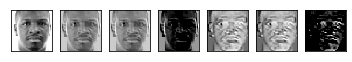

In [ ]:
# visualize data
inc_visualize_data(inc_test_data, inc_model, num_images=1, layers=7)

In [ ]:
# SGD OPTIMIZER
inc_model2 = InceptionV3(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
inc_model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model2.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model2.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 34s 66ms/step - loss: 1.9395 - accuracy: 0.2271 - top_k_categorical_accuracy: 0.4214
Epoch 2/10
442/442 [==============================] - 29s 66ms/step - loss: 1.7840 - accuracy: 0.2821 - top_k_categorical_accuracy: 0.4780
Epoch 3/10
442/442 [==============================] - 29s 65ms/step - loss: 1.7124 - accuracy: 0.3212 - top_k_categorical_accuracy: 0.5307
Epoch 4/10
442/442 [==============================] - 29s 66ms/step - loss: 1.6229 - accuracy: 0.3692 - top_k_categorical_accuracy: 0.5711
Epoch 5/10
442/442 [==============================] - 29s 66ms/step - loss: 1.5340 - accuracy: 0.4089 - top_k_categorical_accuracy: 0.6053
Epoch 6/10
442/442 [==============================] - 29s 65ms/step - loss: 1.4470 - accuracy: 0.4541 - top_k_categorical_accuracy: 0.6458
Epoch 7/10
442/442 [==============================] - 29s 65ms/step - loss: 1.3685 - accuracy: 0.4865 - top_k_categorical_accuracy: 0.6870
Epoch 8/10
442/442 [=======

[1.457711935043335, 0.4785623252391815, 0.6769492030143738]

In [ ]:
# ADAM OPTIMIZER
inc_model3 = InceptionV3(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
inc_model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model3.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model3.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 36s 68ms/step - loss: 2.8050 - accuracy: 0.2274 - top_k_categorical_accuracy: 0.4110
Epoch 2/10
442/442 [==============================] - 30s 68ms/step - loss: 2.1664 - accuracy: 0.2535 - top_k_categorical_accuracy: 0.4289
Epoch 3/10
442/442 [==============================] - 30s 67ms/step - loss: 2.0565 - accuracy: 0.2484 - top_k_categorical_accuracy: 0.4280
Epoch 4/10
442/442 [==============================] - 30s 68ms/step - loss: 1.8425 - accuracy: 0.2453 - top_k_categorical_accuracy: 0.4334
Epoch 5/10
442/442 [==============================] - 30s 68ms/step - loss: 1.7583 - accuracy: 0.2400 - top_k_categorical_accuracy: 0.4371
Epoch 6/10
442/442 [==============================] - 30s 68ms/step - loss: 1.7450 - accuracy: 0.2494 - top_k_categorical_accuracy: 0.4351
Epoch 7/10
442/442 [==============================] - 30s 68ms/step - loss: 1.7380 - accuracy: 0.2585 - top_k_categorical_accuracy: 0.4416
Epoch 8/10
442/442 [=======

[1.7634775638580322, 0.2968727946281433, 0.4665345847606659]

In [ ]:
# 15 EPOCHS
inc_model4 = InceptionV3(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
inc_model4.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model4.fit(inc_train_data, epochs=15)

# evaluate on test set
inc_model4.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 44s 78ms/step - loss: 3.1933 - accuracy: 0.2256 - top_k_categorical_accuracy: 0.4029
Epoch 2/15
442/442 [==============================] - 34s 78ms/step - loss: 1.8010 - accuracy: 0.2515 - top_k_categorical_accuracy: 0.4287
Epoch 3/15
442/442 [==============================] - 34s 77ms/step - loss: 1.7590 - accuracy: 0.2528 - top_k_categorical_accuracy: 0.4329
Epoch 4/15
442/442 [==============================] - 34s 77ms/step - loss: 1.7405 - accuracy: 0.2603 - top_k_categorical_accuracy: 0.4503
Epoch 5/15
442/442 [==============================] - 34s 77ms/step - loss: 1.6904 - accuracy: 0.2852 - top_k_categorical_accuracy: 0.4933
Epoch 6/15
442/442 [==============================] - 34s 77ms/step - loss: 1.6183 - accuracy: 0.3215 - top_k_categorical_accuracy: 0.5192
Epoch 7/15
442/442 [==============================] - 34s 78ms/step - loss: 1.4649 - accuracy: 0.3917 - top_k_categorical_accuracy: 0.5847
Epoch 8/15
442/442 [=======

[1.2778496742248535, 0.536295473575592, 0.7165699601173401]

In [ ]:
# LR = 1
inc_model5 = InceptionV3(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
inc_model5.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model5.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model5.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 77ms/step - loss: 200.5838 - accuracy: 0.1877 - top_k_categorical_accuracy: 0.4179
Epoch 2/10
442/442 [==============================] - 34s 76ms/step - loss: 2.6374 - accuracy: 0.2062 - top_k_categorical_accuracy: 0.3753
Epoch 3/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9482 - accuracy: 0.1999 - top_k_categorical_accuracy: 0.3726
Epoch 4/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9588 - accuracy: 0.1953 - top_k_categorical_accuracy: 0.3729
Epoch 5/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9317 - accuracy: 0.2006 - top_k_categorical_accuracy: 0.3805
Epoch 6/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9081 - accuracy: 0.1975 - top_k_categorical_accuracy: 0.3801
Epoch 7/10
442/442 [==============================] - 33s 75ms/step - loss: 1.9103 - accuracy: 0.1995 - top_k_categorical_accuracy: 0.3749
Epoch 8/10
442/442 [=====

[77082.6171875, 0.1744728982448578, 1.0]

In [ ]:
# SOFTMAX ACTIVATION
inc_model9 = InceptionV3(weights=None, classes = 6, include_top=True, classifier_activation="softmax", input_shape=(75, 75, 1))
inc_model9.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model9.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model9.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 77ms/step - loss: 3.1550 - accuracy: 0.2297 - top_k_categorical_accuracy: 0.4019
Epoch 2/10
442/442 [==============================] - 34s 77ms/step - loss: 1.8104 - accuracy: 0.2501 - top_k_categorical_accuracy: 0.4254
Epoch 3/10
442/442 [==============================] - 34s 77ms/step - loss: 1.7784 - accuracy: 0.2590 - top_k_categorical_accuracy: 0.4474
Epoch 4/10
442/442 [==============================] - 34s 77ms/step - loss: 1.6606 - accuracy: 0.3132 - top_k_categorical_accuracy: 0.5085
Epoch 5/10
442/442 [==============================] - 34s 77ms/step - loss: 1.5152 - accuracy: 0.3806 - top_k_categorical_accuracy: 0.5680
Epoch 6/10
442/442 [==============================] - 34s 77ms/step - loss: 1.3866 - accuracy: 0.4300 - top_k_categorical_accuracy: 0.6240
Epoch 7/10
442/442 [==============================] - 34s 77ms/step - loss: 1.3259 - accuracy: 0.4581 - top_k_categorical_accuracy: 0.6497
Epoch 8/10
442/442 [=======

[1.3264858722686768, 0.4946936368942261, 0.6837413311004639]

In [ ]:
# RELU ACTIVATION
inc_model10 = InceptionV3(weights=None, classes = 6, include_top=True, classifier_activation="relu", input_shape=(75, 75, 1))
inc_model10.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model10.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model10.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 77ms/step - loss: nan - accuracy: 0.2552 - top_k_categorical_accuracy: 0.4300
Epoch 2/10
442/442 [==============================] - 34s 77ms/step - loss: 9.4664 - accuracy: 0.2560 - top_k_categorical_accuracy: 0.4307
Epoch 3/10
442/442 [==============================] - 34s 76ms/step - loss: 9.5149 - accuracy: 0.2602 - top_k_categorical_accuracy: 0.4273
Epoch 4/10
442/442 [==============================] - 34s 77ms/step - loss: 9.5335 - accuracy: 0.2553 - top_k_categorical_accuracy: 0.4260
Epoch 5/10
442/442 [==============================] - 34s 77ms/step - loss: 9.5830 - accuracy: 0.2725 - top_k_categorical_accuracy: 0.4225
Epoch 6/10
442/442 [==============================] - 34s 77ms/step - loss: 9.4653 - accuracy: 0.3140 - top_k_categorical_accuracy: 0.4318
Epoch 7/10
442/442 [==============================] - 34s 77ms/step - loss: 9.5177 - accuracy: 0.3284 - top_k_categorical_accuracy: 0.4474
Epoch 8/10
442/442 [==========

[9.548828125, 0.31682467460632324, 0.5889344811439514]

In [ ]:
# SIGMOID ACTIVATION
inc_model11 = InceptionV3(weights=None, classes = 6, include_top=True, classifier_activation="sigmoid", input_shape=(75, 75, 1))
inc_model11.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model11.fit(inc_train_data, epochs=10)

# evaluate on test set
inc_model11.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 77ms/step - loss: 3.2936 - accuracy: 0.2280 - top_k_categorical_accuracy: 0.4166
Epoch 2/10
442/442 [==============================] - 34s 77ms/step - loss: 1.7874 - accuracy: 0.2426 - top_k_categorical_accuracy: 0.4221
Epoch 3/10
442/442 [==============================] - 34s 77ms/step - loss: 1.7604 - accuracy: 0.2478 - top_k_categorical_accuracy: 0.4316
Epoch 4/10
442/442 [==============================] - 35s 78ms/step - loss: 1.6705 - accuracy: 0.2938 - top_k_categorical_accuracy: 0.4785
Epoch 5/10
442/442 [==============================] - 35s 78ms/step - loss: 1.4809 - accuracy: 0.3962 - top_k_categorical_accuracy: 0.5878
Epoch 6/10
442/442 [==============================] - 34s 78ms/step - loss: 1.3527 - accuracy: 0.4427 - top_k_categorical_accuracy: 0.6454
Epoch 7/10
442/442 [==============================] - 34s 78ms/step - loss: 1.2778 - accuracy: 0.4857 - top_k_categorical_accuracy: 0.6905
Epoch 8/10
442/442 [=======

[1.3865886926651, 0.5067213773727417, 0.6949200630187988]

In [ ]:
# mean-center images
inc_no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
inc_no_norm_train_data = inc_no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (75,75), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
inc_no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
inc_no_norm_test_data = inc_no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (75,75), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

inc_model = InceptionV3(weights=None, classes=6, include_top=True, pooling=None, input_shape=(75,75,1))
inc_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
inc_model.fit(inc_no_norm_train_data, epochs=10)

# evaluate on test set
inc_model.evaluate(inc_no_norm_test_data, batch_size=64)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 46s 79ms/step - loss: 3.3098 - accuracy: 0.2217 - top_k_categorical_accuracy: 0.3963
Epoch 2/10
442/442 [==============================] - 35s 78ms/step - loss: 1.7975 - accuracy: 0.2516 - top_k_categorical_accuracy: 0.4346
Epoch 3/10
442/442 [==============================] - 34s 77ms/step - loss: 1.7594 - accuracy: 0.2514 - top_k_categorical_accuracy: 0.4424
Epoch 4/10
442/442 [==============================] - 35s 79ms/step - loss: 1.6023 - accuracy: 0.3435 - top_k_categorical_accuracy: 0.5362
Epoch 5/10
442/442 [==============================] - 34s 78ms/step - loss: 1.3890 - accuracy: 0.4312 - top_k_categorical_accuracy: 0.6253
Epoch 6/10
442/442 [==============================] - 34s 78ms/step - loss: 1.3174 - accuracy: 0.4543 - top_k_categorical_accuracy: 0.6587
Epoch 7/10
442/442 [==============================] - 34s 77ms/step - loss: 1.2580 - accuracy: 0.4868 - top_k_categorical_accuracy: 0.6922
Epoch 8/10
442/442 [=======

[1.5190527439117432, 0.4669591188430786, 0.6502051949501038]

### InceptionResNetV2

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
# BASE VERSION
incres_model = InceptionResNetV2(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
incres_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 102s 169ms/step - loss: 2.9281 - accuracy: 0.2333 - top_k_categorical_accuracy: 0.4055
Epoch 2/10
442/442 [==============================] - 76s 172ms/step - loss: 1.7798 - accuracy: 0.2504 - top_k_categorical_accuracy: 0.4324
Epoch 3/10
442/442 [==============================] - 77s 173ms/step - loss: 1.7620 - accuracy: 0.2515 - top_k_categorical_accuracy: 0.4390
Epoch 4/10
442/442 [==============================] - 77s 174ms/step - loss: 1.7134 - accuracy: 0.2800 - top_k_categorical_accuracy: 0.4714
Epoch 5/10
442/442 [==============================] - 77s 175ms/step - loss: 1.5202 - accuracy: 0.3747 - top_k_categorical_accuracy: 0.5710
Epoch 6/10
442/442 [==============================] - 77s 175ms/step - loss: 1.3586 - accuracy: 0.4560 - top_k_categorical_accuracy: 0.6588
Epoch 7/10
442/442 [==============================] - 77s 175ms/step - loss: 1.2627 - accuracy: 0.4991 - top_k_categorical_accuracy: 0.6990
Epoch 8/10
442/442 

[1.5130109786987305, 0.4591764509677887, 0.661383867263794]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


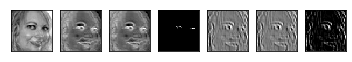

In [ ]:
# visualize data
inc_visualize_data(inc_test_data, incres_model, num_images=1, layers=7)

In [ ]:
# SGD OPTIMIZER
incres_model2 = InceptionResNetV2(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
incres_model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model2.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model2.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 75s 142ms/step - loss: 1.8101 - accuracy: 0.2773 - top_k_categorical_accuracy: 0.4741
Epoch 2/10
442/442 [==============================] - 64s 144ms/step - loss: 1.4361 - accuracy: 0.4434 - top_k_categorical_accuracy: 0.6487
Epoch 3/10
442/442 [==============================] - 64s 144ms/step - loss: 1.2010 - accuracy: 0.5451 - top_k_categorical_accuracy: 0.7403
Epoch 4/10
442/442 [==============================] - 64s 144ms/step - loss: 0.9766 - accuracy: 0.6448 - top_k_categorical_accuracy: 0.8224
Epoch 5/10
442/442 [==============================] - 64s 144ms/step - loss: 0.7475 - accuracy: 0.7432 - top_k_categorical_accuracy: 0.8914
Epoch 6/10
442/442 [==============================] - 64s 144ms/step - loss: 0.5527 - accuracy: 0.8202 - top_k_categorical_accuracy: 0.9347
Epoch 7/10
442/442 [==============================] - 64s 144ms/step - loss: 0.3786 - accuracy: 0.8822 - top_k_categorical_accuracy: 0.9679
Epoch 8/10
442/442 [

[1.8143631219863892, 0.5194566249847412, 0.7077968120574951]

In [ ]:
# ADAM OPTIMIZER
incres_model3 = InceptionResNetV2(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
incres_model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model3.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model3.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 81s 149ms/step - loss: 2.5121 - accuracy: 0.2337 - top_k_categorical_accuracy: 0.4059
Epoch 2/10
442/442 [==============================] - 66s 150ms/step - loss: 1.8473 - accuracy: 0.2490 - top_k_categorical_accuracy: 0.4289
Epoch 3/10
442/442 [==============================] - 67s 151ms/step - loss: 1.8028 - accuracy: 0.2529 - top_k_categorical_accuracy: 0.4340
Epoch 4/10
442/442 [==============================] - 67s 151ms/step - loss: 1.7579 - accuracy: 0.2625 - top_k_categorical_accuracy: 0.4446
Epoch 5/10
442/442 [==============================] - 67s 151ms/step - loss: 1.7454 - accuracy: 0.2537 - top_k_categorical_accuracy: 0.4456
Epoch 6/10
442/442 [==============================] - 67s 151ms/step - loss: 1.7280 - accuracy: 0.2625 - top_k_categorical_accuracy: 0.4645
Epoch 7/10
442/442 [==============================] - 67s 151ms/step - loss: 1.7075 - accuracy: 0.2746 - top_k_categorical_accuracy: 0.4825
Epoch 8/10
442/442 [

[1.680959939956665, 0.3244658410549164, 0.5109664797782898]

In [ ]:
# 15 EPOCHS
incres_model4 = InceptionResNetV2(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
incres_model4.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model4.fit(inc_train_data, epochs=15)

# evaluate on test set
incres_model4.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 101s 173ms/step - loss: 2.8388 - accuracy: 0.2270 - top_k_categorical_accuracy: 0.4020
Epoch 2/15
442/442 [==============================] - 77s 174ms/step - loss: 1.8056 - accuracy: 0.2493 - top_k_categorical_accuracy: 0.4272
Epoch 3/15
442/442 [==============================] - 77s 174ms/step - loss: 1.7632 - accuracy: 0.2545 - top_k_categorical_accuracy: 0.4329
Epoch 4/15
442/442 [==============================] - 77s 174ms/step - loss: 1.7123 - accuracy: 0.2740 - top_k_categorical_accuracy: 0.4661
Epoch 5/15
442/442 [==============================] - 77s 174ms/step - loss: 1.5259 - accuracy: 0.3787 - top_k_categorical_accuracy: 0.5776
Epoch 6/15
442/442 [==============================] - 77s 174ms/step - loss: 1.3628 - accuracy: 0.4503 - top_k_categorical_accuracy: 0.6532
Epoch 7/15
442/442 [==============================] - 77s 174ms/step - loss: 1.2591 - accuracy: 0.5006 - top_k_categorical_accuracy: 0.7113
Epoch 8/15
442/442 

[1.4051733016967773, 0.5215791463851929, 0.7203905582427979]

In [ ]:
# LR = 1
incres_model5 = InceptionResNetV2(weights=None, classes = 6, include_top=True, input_shape=(75, 75, 1))
incres_model5.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model5.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model5.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 99s 169ms/step - loss: 122.1186 - accuracy: 0.1928 - top_k_categorical_accuracy: 0.4119
Epoch 2/10
442/442 [==============================] - 75s 169ms/step - loss: 2.4646 - accuracy: 0.2035 - top_k_categorical_accuracy: 0.3790
Epoch 3/10
442/442 [==============================] - 74s 168ms/step - loss: 1.9075 - accuracy: 0.1985 - top_k_categorical_accuracy: 0.3804
Epoch 4/10
442/442 [==============================] - 74s 168ms/step - loss: 1.9395 - accuracy: 0.2027 - top_k_categorical_accuracy: 0.3758
Epoch 5/10
442/442 [==============================] - 75s 169ms/step - loss: 1.9143 - accuracy: 0.1970 - top_k_categorical_accuracy: 0.3713
Epoch 6/10
442/442 [==============================] - 75s 169ms/step - loss: 1.9103 - accuracy: 0.1943 - top_k_categorical_accuracy: 0.3728
Epoch 7/10
442/442 [==============================] - 75s 169ms/step - loss: 1.9203 - accuracy: 0.2003 - top_k_categorical_accuracy: 0.3789
Epoch 8/10
442/442

[2.0284972190856934, 0.17645394802093506, 0.2940427362918854]

In [ ]:
# SOFTMAX ACTIVATION
incres_model9 = InceptionResNetV2(weights=None, classes = 6, include_top=True, classifier_activation="softmax", input_shape=(75, 75, 1))
incres_model9.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model9.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model9.evaluate(inc_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 101s 171ms/step - loss: 2.8892 - accuracy: 0.2299 - top_k_categorical_accuracy: 0.4084
Epoch 2/10
442/442 [==============================] - 76s 172ms/step - loss: 1.8274 - accuracy: 0.2503 - top_k_categorical_accuracy: 0.4300
Epoch 3/10
442/442 [==============================] - 76s 172ms/step - loss: 1.7777 - accuracy: 0.2445 - top_k_categorical_accuracy: 0.4325
Epoch 4/10
442/442 [==============================] - 76s 173ms/step - loss: 1.7395 - accuracy: 0.2644 - top_k_categorical_accuracy: 0.4531
Epoch 5/10
442/442 [==============================] - 76s 173ms/step - loss: 1.5837 - accuracy: 0.3478 - top_k_categorical_accuracy: 0.5422
Epoch 6/10
442/442 [==============================] - 76s 173ms/step - loss: 1.4437 - accuracy: 0.4212 - top_k_categorical_accuracy: 0.6212
Epoch 7/10
442/442 [==============================] - 76s 173ms/step - loss: 1.3524 - accuracy: 0.4629 - top_k_categorical_accuracy: 0.6641
Epoch 8/10
442/442 

[1.4241764545440674, 0.4706381857395172, 0.6715720891952515]

In [ ]:
# RELU ACTIVATION
incres_model10 = InceptionResNetV2(weights=None, classes = 6, include_top=True, classifier_activation="relu", input_shape=(75, 75, 1))
incres_model10.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model10.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model10.evaluate(inc_test_data, batch_size=64)

In [ ]:
# SIGMOID ACTIVATION
incres_model11 = InceptionResNetV2(weights=None, classes = 6, include_top=True, classifier_activation="sigmoid", input_shape=(75, 75, 1))
incres_model11.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model11.fit(inc_train_data, epochs=10)

# evaluate on test set
incres_model11.evaluate(inc_test_data, batch_size=64)

In [ ]:
# mean-center images
inc_no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
inc_no_norm_train_data = inc_no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (75,75), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
inc_no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
inc_no_norm_test_data = inc_no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (75,75), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

incres_model = InceptionResNetV2(weights=None, classes=6, include_top=True, pooling=None, input_shape=(75,75,1))
incres_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
incres_model.fit(inc_no_norm_train_data, epochs=10)

# evaluate on test set
incres_model.evaluate(inc_no_norm_test_data, batch_size=64)

## DenseNet

### DenseNet121

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 44s 66ms/step - loss: 2.3124 - accuracy: 0.2302 - top_k_categorical_accuracy: 0.4087
Epoch 2/10
442/442 [==============================] - 29s 66ms/step - loss: 1.7076 - accuracy: 0.2866 - top_k_categorical_accuracy: 0.4826
Epoch 3/10
442/442 [==============================] - 29s 66ms/step - loss: 1.5028 - accuracy: 0.3961 - top_k_categorical_accuracy: 0.5849
Epoch 4/10
442/442 [==============================] - 29s 66ms/step - loss: 1.3697 - accuracy: 0.4533 - top_k_categorical_accuracy: 0.6530
Epoch 5/10
442/442 [==============================] - 29s 66ms/step - loss: 1.2857 - accuracy: 0.4960 - top_k_categorical_accuracy: 0.6931
Epoch 6/10
442/442 [==============================] - 29s 66ms/step - loss: 1.2210 - accuracy: 0.5218 - top_k_categorical_accuracy: 0.7250
Epoch 7/10
442/442 [==============================] - 29s 66ms/step - loss: 1.1606 - accuracy: 0.5509 - top_k_categorical_accuracy: 0.7461
Epoch 8/10
442/442 [=======

[1.5681778192520142, 0.41191452741622925, 0.600962221622467]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


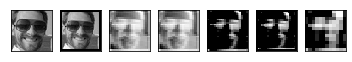

In [ ]:
# visualizing first 7 layers
visualize_data(test_data, den121_model, num_images=1, layers=7)

In [ ]:
# visualizing base model
from keras.utils import plot_model
plt = plot_model(den121_model, to_file='den121_model.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785422 to fit



In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 15 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=15)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 52s 76ms/step - loss: 2.3714 - accuracy: 0.2292 - top_k_categorical_accuracy: 0.4126
Epoch 2/15
442/442 [==============================] - 34s 76ms/step - loss: 1.7498 - accuracy: 0.2536 - top_k_categorical_accuracy: 0.4404
Epoch 3/15
442/442 [==============================] - 33s 75ms/step - loss: 1.5320 - accuracy: 0.3788 - top_k_categorical_accuracy: 0.5747
Epoch 4/15
442/442 [==============================] - 33s 75ms/step - loss: 1.3798 - accuracy: 0.4517 - top_k_categorical_accuracy: 0.6506
Epoch 5/15
442/442 [==============================] - 33s 75ms/step - loss: 1.2748 - accuracy: 0.5021 - top_k_categorical_accuracy: 0.7003
Epoch 6/15
442/442 [==============================] - 33s 75ms/step - loss: 1.2125 - accuracy: 0.5254 - top_k_categorical_accuracy: 0.7285
Epoch 7/15
442/442 [==============================] - 33s 75ms/step - loss: 1.1709 - accuracy: 0.5500 - top_k_categorical_accuracy: 0.7458
Epoch 8/15
442/442 [=======

[1.6149481534957886, 0.5345973968505859, 0.7227960824966431]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=1, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 51s 75ms/step - loss: 100.8474 - accuracy: 0.2062 - top_k_categorical_accuracy: 0.4056
Epoch 2/10
442/442 [==============================] - 33s 75ms/step - loss: 1.9095 - accuracy: 0.2022 - top_k_categorical_accuracy: 0.3791
Epoch 3/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9107 - accuracy: 0.1984 - top_k_categorical_accuracy: 0.3706
Epoch 4/10
442/442 [==============================] - 33s 75ms/step - loss: 1.9095 - accuracy: 0.2004 - top_k_categorical_accuracy: 0.3742
Epoch 5/10
442/442 [==============================] - 33s 75ms/step - loss: 1.9059 - accuracy: 0.2000 - top_k_categorical_accuracy: 0.3841
Epoch 6/10
442/442 [==============================] - 33s 75ms/step - loss: 1.9128 - accuracy: 0.1944 - top_k_categorical_accuracy: 0.3740
Epoch 7/10
442/442 [==============================] - 34s 76ms/step - loss: 1.9013 - accuracy: 0.2008 - top_k_categorical_accuracy: 0.3732
Epoch 8/10
442/442 [=====

[1.900286316871643, 0.13527663052082062, 0.3858780264854431]

In [ ]:
# train with -- random weights, pooling None, SGD, lr=0.01, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 34s 58ms/step - loss: 1.8429 - accuracy: 0.2442 - top_k_categorical_accuracy: 0.4354
Epoch 2/10
442/442 [==============================] - 26s 58ms/step - loss: 1.6674 - accuracy: 0.3160 - top_k_categorical_accuracy: 0.5271
Epoch 3/10
442/442 [==============================] - 25s 57ms/step - loss: 1.5654 - accuracy: 0.3733 - top_k_categorical_accuracy: 0.5831
Epoch 4/10
442/442 [==============================] - 26s 58ms/step - loss: 1.4672 - accuracy: 0.4245 - top_k_categorical_accuracy: 0.6296
Epoch 5/10
442/442 [==============================] - 26s 58ms/step - loss: 1.3858 - accuracy: 0.4670 - top_k_categorical_accuracy: 0.6658
Epoch 6/10
442/442 [==============================] - 25s 58ms/step - loss: 1.2924 - accuracy: 0.5057 - top_k_categorical_accuracy: 0.7083
Epoch 7/10
442/442 [==============================] - 25s 57ms/step - loss: 1.2206 - accuracy: 0.5337 - top_k_categorical_accuracy: 0.7330
Epoch 8/10
442/442 [=======

[1.5300376415252686, 0.44431865215301514, 0.6418564915657043]

In [ ]:
# train with -- random weights, pooling None, Adam, lr=0.01, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 36s 60ms/step - loss: 2.1523 - accuracy: 0.2403 - top_k_categorical_accuracy: 0.4254
Epoch 2/10
442/442 [==============================] - 27s 61ms/step - loss: 1.7588 - accuracy: 0.2589 - top_k_categorical_accuracy: 0.4534
Epoch 3/10
442/442 [==============================] - 27s 60ms/step - loss: 1.7181 - accuracy: 0.2744 - top_k_categorical_accuracy: 0.4712
Epoch 4/10
442/442 [==============================] - 27s 60ms/step - loss: 1.5942 - accuracy: 0.3487 - top_k_categorical_accuracy: 0.5535
Epoch 5/10
442/442 [==============================] - 27s 60ms/step - loss: 1.4483 - accuracy: 0.4183 - top_k_categorical_accuracy: 0.6141
Epoch 6/10
442/442 [==============================] - 26s 60ms/step - loss: 1.3261 - accuracy: 0.4730 - top_k_categorical_accuracy: 0.6733
Epoch 7/10
442/442 [==============================] - 26s 60ms/step - loss: 1.2369 - accuracy: 0.5164 - top_k_categorical_accuracy: 0.7170
Epoch 8/10
442/442 [=======

[1.1888166666030884, 0.5551153421401978, 0.7461440563201904]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, softmax, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den121_model.layers[len(den121_model.layers) - 3].output)
insert_layer = Dense(6, activation='softmax')(insert_layer)
den121_model = Model(inputs=den121_model.input, outputs=insert_layer)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 46s 66ms/step - loss: 2.4538 - accuracy: 0.2279 - top_k_categorical_accuracy: 0.4090
Epoch 2/10
442/442 [==============================] - 29s 66ms/step - loss: 1.6372 - accuracy: 0.3231 - top_k_categorical_accuracy: 0.5240
Epoch 3/10
442/442 [==============================] - 29s 66ms/step - loss: 1.4109 - accuracy: 0.4392 - top_k_categorical_accuracy: 0.6372
Epoch 4/10
442/442 [==============================] - 29s 67ms/step - loss: 1.2915 - accuracy: 0.4915 - top_k_categorical_accuracy: 0.6927
Epoch 5/10
442/442 [==============================] - 29s 66ms/step - loss: 1.2208 - accuracy: 0.5195 - top_k_categorical_accuracy: 0.7290
Epoch 6/10
442/442 [==============================] - 29s 66ms/step - loss: 1.1427 - accuracy: 0.5565 - top_k_categorical_accuracy: 0.7587
Epoch 7/10
442/442 [==============================] - 29s 67ms/step - loss: 1.0799 - accuracy: 0.5833 - top_k_categorical_accuracy: 0.7789
Epoch 8/10
442/442 [=======

[1.2158730030059814, 0.5319088697433472, 0.7332673072814941]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, relu, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den121_model.layers[len(den121_model.layers) - 3].output)
insert_layer = Dense(6, activation='relu')(insert_layer)
den121_model = Model(inputs=den121_model.input, outputs=insert_layer)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 46s 66ms/step - loss: nan - accuracy: 0.2460 - top_k_categorical_accuracy: 0.4337
Epoch 2/10
442/442 [==============================] - 29s 67ms/step - loss: 5.0447 - accuracy: 0.2918 - top_k_categorical_accuracy: 0.4809
Epoch 3/10
442/442 [==============================] - 29s 66ms/step - loss: 4.9600 - accuracy: 0.3712 - top_k_categorical_accuracy: 0.5463
Epoch 4/10
442/442 [==============================] - 29s 66ms/step - loss: 4.9034 - accuracy: 0.3956 - top_k_categorical_accuracy: 0.5654
Epoch 5/10
442/442 [==============================] - 29s 67ms/step - loss: 4.9421 - accuracy: 0.4170 - top_k_categorical_accuracy: 0.5848
Epoch 6/10
442/442 [==============================] - 29s 66ms/step - loss: 4.8438 - accuracy: 0.4339 - top_k_categorical_accuracy: 0.6103
Epoch 7/10
442/442 [==============================] - 29s 66ms/step - loss: 4.8376 - accuracy: 0.4429 - top_k_categorical_accuracy: 0.6099
Epoch 8/10
442/442 [==========

[5.055474281311035, 0.4042733907699585, 0.5788877606391907]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, sigmoid, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den121_model.layers[len(den121_model.layers) - 3].output)
insert_layer = Dense(6, activation='sigmoid')(insert_layer)
den121_model = Model(inputs=den121_model.input, outputs=insert_layer)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(train_data, epochs=10)
den121_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 45s 66ms/step - loss: 2.3207 - accuracy: 0.2265 - top_k_categorical_accuracy: 0.4206
Epoch 2/10
442/442 [==============================] - 29s 66ms/step - loss: 1.6831 - accuracy: 0.2947 - top_k_categorical_accuracy: 0.4913
Epoch 3/10
442/442 [==============================] - 30s 67ms/step - loss: 1.4557 - accuracy: 0.4124 - top_k_categorical_accuracy: 0.6087
Epoch 4/10
442/442 [==============================] - 29s 66ms/step - loss: 1.3269 - accuracy: 0.4759 - top_k_categorical_accuracy: 0.6754
Epoch 5/10
442/442 [==============================] - 29s 66ms/step - loss: 1.2391 - accuracy: 0.5154 - top_k_categorical_accuracy: 0.7165
Epoch 6/10
442/442 [==============================] - 29s 67ms/step - loss: 1.1602 - accuracy: 0.5493 - top_k_categorical_accuracy: 0.7474
Epoch 7/10
442/442 [==============================] - 29s 67ms/step - loss: 1.1104 - accuracy: 0.5709 - top_k_categorical_accuracy: 0.7690
Epoch 8/10
442/442 [=======

[1.4927103519439697, 0.45747843384742737, 0.641431987285614]

In [ ]:
# mean-center images
no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_train_data = no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_test_data = no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
den121_model = DenseNet121(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den121_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den121_model.fit(no_norm_train_data, epochs=10)
den121_model.evaluate(no_norm_test_data, batch_size=64)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 49s 72ms/step - loss: 2.3005 - accuracy: 0.2318 - top_k_categorical_accuracy: 0.4117
Epoch 2/10
442/442 [==============================] - 32s 73ms/step - loss: 1.7128 - accuracy: 0.2746 - top_k_categorical_accuracy: 0.4648
Epoch 3/10
442/442 [==============================] - 33s 74ms/step - loss: 1.4920 - accuracy: 0.4037 - top_k_categorical_accuracy: 0.6030
Epoch 4/10
442/442 [==============================] - 32s 73ms/step - loss: 1.3696 - accuracy: 0.4576 - top_k_categorical_accuracy: 0.6591
Epoch 5/10
442/442 [==============================] - 32s 73ms/step - loss: 1.2879 - accuracy: 0.4947 - top_k_categorical_accuracy: 0.6976
Epoch 6/10
442/442 [==============================] - 32s 73ms/step - loss: 1.2022 - accuracy: 0.5355 - top_k_categorical_accuracy: 0.7359
Epoch 7/10
442/442 [==============================] - 32s 73ms/step - loss: 1.1486 - accuracy: 0.5569 - top_k_categorical_accuracy: 0.7492
Epoch 8/10
442/442 [=======

[1.2456247806549072, 0.5252582430839539, 0.7216640710830688]

### DenseNet169

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 69s 99ms/step - loss: 2.6640 - accuracy: 0.2197 - top_k_categorical_accuracy: 0.4047
Epoch 2/10
442/442 [==============================] - 43s 96ms/step - loss: 1.7499 - accuracy: 0.2638 - top_k_categorical_accuracy: 0.4534
Epoch 3/10
442/442 [==============================] - 43s 96ms/step - loss: 1.5449 - accuracy: 0.3710 - top_k_categorical_accuracy: 0.5702
Epoch 4/10
442/442 [==============================] - 42s 96ms/step - loss: 1.3707 - accuracy: 0.4565 - top_k_categorical_accuracy: 0.6567
Epoch 5/10
442/442 [==============================] - 42s 96ms/step - loss: 1.2664 - accuracy: 0.4981 - top_k_categorical_accuracy: 0.7066
Epoch 6/10
442/442 [==============================] - 43s 97ms/step - loss: 1.1815 - accuracy: 0.5423 - top_k_categorical_accuracy: 0.7420
Epoch 7/10
442/442 [==============================] - 42s 96ms/step - loss: 1.1260 - accuracy: 0.5620 - top_k_categorical_accuracy: 0.7671
Epoch 8/10
442/442 [=======

[1.2990654706954956, 0.519598126411438, 0.7034102082252502]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


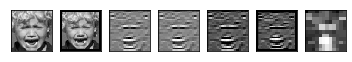

In [ ]:
# visualizing first 7 layers
visualize_data(test_data, den169_model, num_images=1, layers=7)

In [ ]:
# visualizing base model
from keras.utils import plot_model
plt = plot_model(den169_model, to_file='den169_model.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.564258 to fit



In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 15 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=15)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
442/442 [==============================] - 69s 98ms/step - loss: 2.7432 - accuracy: 0.2212 - top_k_categorical_accuracy: 0.4063
Epoch 2/15
442/442 [==============================] - 44s 99ms/step - loss: 1.7308 - accuracy: 0.2625 - top_k_categorical_accuracy: 0.4609
Epoch 3/15
442/442 [==============================] - 43s 98ms/step - loss: 1.5237 - accuracy: 0.3890 - top_k_categorical_accuracy: 0.5883
Epoch 4/15
442/442 [==============================] - 42s 96ms/step - loss: 1.3866 - accuracy: 0.4470 - top_k_categorical_accuracy: 0.6448
Epoch 5/15
442/442 [==============================] - 42s 96ms/step - loss: 1.2747 - accuracy: 0.4985 - top_k_categorical_accuracy: 0.6986
Epoch 6/15
442/442 [==============================] - 43s 97ms/step - loss: 1.2224 - accuracy: 0.5162 - top_k_categorical_accuracy: 0.7216
Epoch 7/15
442/442 [==============================] - 43s 97ms/step - loss: 1.1770 - accuracy: 0.5441 - top_k_categorical_accuracy: 0.7401
Epoch 8/15
442/442 [=======

[10.230649948120117, 0.5160605907440186, 0.7075138092041016]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=1, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 67s 94ms/step - loss: 224.6446 - accuracy: 0.1967 - top_k_categorical_accuracy: 0.4199
Epoch 2/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9076 - accuracy: 0.2020 - top_k_categorical_accuracy: 0.3779
Epoch 3/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9133 - accuracy: 0.1979 - top_k_categorical_accuracy: 0.3737
Epoch 4/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9173 - accuracy: 0.1969 - top_k_categorical_accuracy: 0.3728
Epoch 5/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9089 - accuracy: 0.2027 - top_k_categorical_accuracy: 0.3759
Epoch 6/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9180 - accuracy: 0.1965 - top_k_categorical_accuracy: 0.3795
Epoch 7/10
442/442 [==============================] - 41s 93ms/step - loss: 1.9111 - accuracy: 0.2015 - top_k_categorical_accuracy: 0.3752
Epoch 8/10
442/442 [=====

[134.25511169433594, 0.25272393226623535, 0.3945097029209137]

In [ ]:
# train with -- random weights, pooling None, SGD, lr=0.01, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 43s 70ms/step - loss: 1.8715 - accuracy: 0.2408 - top_k_categorical_accuracy: 0.4306
Epoch 2/10
442/442 [==============================] - 31s 71ms/step - loss: 1.7300 - accuracy: 0.2894 - top_k_categorical_accuracy: 0.4958
Epoch 3/10
442/442 [==============================] - 31s 70ms/step - loss: 1.6107 - accuracy: 0.3501 - top_k_categorical_accuracy: 0.5612
Epoch 4/10
442/442 [==============================] - 31s 70ms/step - loss: 1.5232 - accuracy: 0.4005 - top_k_categorical_accuracy: 0.6092
Epoch 5/10
442/442 [==============================] - 30s 69ms/step - loss: 1.4442 - accuracy: 0.4348 - top_k_categorical_accuracy: 0.6433
Epoch 6/10
442/442 [==============================] - 30s 69ms/step - loss: 1.3435 - accuracy: 0.4867 - top_k_categorical_accuracy: 0.6939
Epoch 7/10
442/442 [==============================] - 31s 70ms/step - loss: 1.2642 - accuracy: 0.5166 - top_k_categorical_accuracy: 0.7196
Epoch 8/10
442/442 [=======

[1.5341979265213013, 0.43809252977371216, 0.6316683292388916]

In [ ]:
# train with -- random weights, pooling None, Adam, lr=0.01, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 47s 75ms/step - loss: 2.4192 - accuracy: 0.2200 - top_k_categorical_accuracy: 0.4081
Epoch 2/10
442/442 [==============================] - 33s 74ms/step - loss: 1.7736 - accuracy: 0.2548 - top_k_categorical_accuracy: 0.4478
Epoch 3/10
442/442 [==============================] - 33s 74ms/step - loss: 1.7235 - accuracy: 0.2632 - top_k_categorical_accuracy: 0.4689
Epoch 4/10
442/442 [==============================] - 33s 74ms/step - loss: 1.6551 - accuracy: 0.3173 - top_k_categorical_accuracy: 0.5186
Epoch 5/10
442/442 [==============================] - 33s 74ms/step - loss: 1.5183 - accuracy: 0.3899 - top_k_categorical_accuracy: 0.5908
Epoch 6/10
442/442 [==============================] - 33s 74ms/step - loss: 1.3901 - accuracy: 0.4516 - top_k_categorical_accuracy: 0.6444
Epoch 7/10
442/442 [==============================] - 33s 74ms/step - loss: 1.2914 - accuracy: 0.4890 - top_k_categorical_accuracy: 0.6905
Epoch 8/10
442/442 [=======

[1.380561113357544, 0.45875194668769836, 0.6710060834884644]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, softmax, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den169_model.layers[len(den169_model.layers) - 3].output)
insert_layer = Dense(6, activation='softmax')(insert_layer)
den169_model = Model(inputs=den169_model.input, outputs=insert_layer)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 63s 91ms/step - loss: 2.6602 - accuracy: 0.2189 - top_k_categorical_accuracy: 0.3985
Epoch 2/10
442/442 [==============================] - 40s 90ms/step - loss: 1.7238 - accuracy: 0.2774 - top_k_categorical_accuracy: 0.4685
Epoch 3/10
442/442 [==============================] - 40s 90ms/step - loss: 1.5472 - accuracy: 0.3670 - top_k_categorical_accuracy: 0.5737
Epoch 4/10
442/442 [==============================] - 40s 91ms/step - loss: 1.4188 - accuracy: 0.4343 - top_k_categorical_accuracy: 0.6296
Epoch 5/10
442/442 [==============================] - 40s 90ms/step - loss: 1.3376 - accuracy: 0.4732 - top_k_categorical_accuracy: 0.6731
Epoch 6/10
442/442 [==============================] - 40s 90ms/step - loss: 1.2644 - accuracy: 0.5053 - top_k_categorical_accuracy: 0.7048
Epoch 7/10
442/442 [==============================] - 40s 89ms/step - loss: 1.1832 - accuracy: 0.5381 - top_k_categorical_accuracy: 0.7363
Epoch 8/10
442/442 [=======

[1.5054163932800293, 0.4970991909503937, 0.6881279349327087]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, relu, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den169_model.layers[len(den169_model.layers) - 3].output)
insert_layer = Dense(6, activation='relu')(insert_layer)
den169_model = Model(inputs=den169_model.input, outputs=insert_layer)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 63s 89ms/step - loss: nan - accuracy: 0.2443 - top_k_categorical_accuracy: 0.4250
Epoch 2/10
442/442 [==============================] - 39s 89ms/step - loss: 5.0730 - accuracy: 0.2679 - top_k_categorical_accuracy: 0.4581
Epoch 3/10
442/442 [==============================] - 39s 89ms/step - loss: 4.9496 - accuracy: 0.3580 - top_k_categorical_accuracy: 0.5420
Epoch 4/10
442/442 [==============================] - 39s 89ms/step - loss: 4.9099 - accuracy: 0.3968 - top_k_categorical_accuracy: 0.5681
Epoch 5/10
442/442 [==============================] - 39s 88ms/step - loss: 4.9075 - accuracy: 0.4129 - top_k_categorical_accuracy: 0.5925
Epoch 6/10
442/442 [==============================] - 39s 88ms/step - loss: 4.9168 - accuracy: 0.4322 - top_k_categorical_accuracy: 0.5980
Epoch 7/10
442/442 [==============================] - 39s 89ms/step - loss: 4.9628 - accuracy: 0.4314 - top_k_categorical_accuracy: 0.5999
Epoch 8/10
442/442 [==========

[nan, 0.41983869671821594, 0.6168105006217957]

In [ ]:
# train with -- random weights, pooling None, RMSProp, lr=0.01, sigmoid, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
insert_layer = GlobalAveragePooling2D()(den169_model.layers[len(den169_model.layers) - 3].output)
insert_layer = Dense(6, activation='sigmoid')(insert_layer)
den169_model = Model(inputs=den169_model.input, outputs=insert_layer)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(train_data, epochs=10)
den169_model.evaluate(test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 62s 89ms/step - loss: 2.5955 - accuracy: 0.2199 - top_k_categorical_accuracy: 0.4140
Epoch 2/10
442/442 [==============================] - 39s 89ms/step - loss: 1.7587 - accuracy: 0.2527 - top_k_categorical_accuracy: 0.4418
Epoch 3/10
442/442 [==============================] - 39s 89ms/step - loss: 1.6649 - accuracy: 0.3005 - top_k_categorical_accuracy: 0.5008
Epoch 4/10
442/442 [==============================] - 39s 89ms/step - loss: 1.5072 - accuracy: 0.3914 - top_k_categorical_accuracy: 0.5941
Epoch 5/10
442/442 [==============================] - 39s 89ms/step - loss: 1.3896 - accuracy: 0.4478 - top_k_categorical_accuracy: 0.6458
Epoch 6/10
442/442 [==============================] - 39s 89ms/step - loss: 1.2958 - accuracy: 0.4922 - top_k_categorical_accuracy: 0.6934
Epoch 7/10
442/442 [==============================] - 39s 88ms/step - loss: 1.2413 - accuracy: 0.5181 - top_k_categorical_accuracy: 0.7130
Epoch 8/10
442/442 [=======

[1.320737600326538, 0.4860619902610779, 0.6957690715789795]

In [ ]:
# mean-center images
no_norm_train_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_train_data = no_norm_train_data.flow_from_directory(train_folder, seed=117, target_size = (48,48), shuffle=True, color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# mean-center testing images
no_norm_test_data = ImageDataGenerator(rescale=1./255, zca_whitening=True, featurewise_center = True, featurewise_std_normalization = False)
no_norm_test_data = no_norm_test_data.flow_from_directory(test_folder, seed=117, shuffle=True, target_size = (48,48), color_mode='grayscale', batch_size=64, class_mode = 'categorical')

# train with -- random weights, pooling None, RMSProp, lr=0.01, categorical_crossentropy, 10 epochs  --
den169_model = DenseNet169(include_top=True, weights=None, input_shape=(48,48,1), pooling=None, classes=6)
den169_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
den169_model.fit(no_norm_train_data, epochs=10)
den169_model.evaluate(no_norm_test_data, batch_size=64)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 67s 95ms/step - loss: 2.6489 - accuracy: 0.2293 - top_k_categorical_accuracy: 0.4104
Epoch 2/10
442/442 [==============================] - 42s 94ms/step - loss: 1.7392 - accuracy: 0.2594 - top_k_categorical_accuracy: 0.4516
Epoch 3/10
442/442 [==============================] - 41s 94ms/step - loss: 1.5447 - accuracy: 0.3728 - top_k_categorical_accuracy: 0.5671
Epoch 4/10
442/442 [==============================] - 41s 93ms/step - loss: 1.3745 - accuracy: 0.4507 - top_k_categorical_accuracy: 0.6517
Epoch 5/10
442/442 [==============================] - 42s 94ms/step - loss: 1.2906 - accuracy: 0.4973 - top_k_categorical_accuracy: 0.6893
Epoch 6/10
442/442 [==============================] - 41s 93ms/step - loss: 1.2333 - accuracy: 0.5188 - top_k_categorical_accuracy: 0.7244
Epoch 7/10
442/442 [==============================] - 41s 94ms/step - loss: 1.1788 - accuracy: 0.5460 - top_k_categorical_accuracy: 0.7399
Epoch 8/10
442/442 [=======

[1.8535418510437012, 0.5253997445106506, 0.7283146977424622]

## VGG

### VGG 16



In [ ]:
from keras.applications import VGG16
#print(type(train_data))
#rgb_train_data = tf.image.grayscale_to_rgb(train_data)
vgg16_model = VGG16(include_top=True, weights=None, input_shape=(48,48,3), pooling=None, classes=6,)
vgg16_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
vgg16_model.fit(vgg_train_data, epochs=10)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 28s 63ms/step - loss: 1.7766 - accuracy: 0.2511 - top_k_categorical_accuracy: 0.4269
Epoch 2/10
442/442 [==============================] - 27s 62ms/step - loss: 1.7580 - accuracy: 0.2546 - top_k_categorical_accuracy: 0.4323
Epoch 3/10
442/442 [==============================] - 27s 61ms/step - loss: 1.7577 - accuracy: 0.2548 - top_k_categorical_accuracy: 0.4298
Epoch 4/10
442/442 [==============================] - 27s 62ms/step - loss: 1.7572 - accuracy: 0.2540 - top_k_categorical_accuracy: 0.4329
Epoch 5/10
442/442 [==============================] - 27s 62ms/step - loss: 1.7555 - accuracy: 0.2590 - top_k_categorical_accuracy: 0.4346
Epoch 6/10
442/442 [==============================] - 27s 62ms/step - loss: 1.7565 - accuracy: 0.2559 - top_k_categorical_accuracy: 0.4342
Epoch 7/10
442/442 [==============================] - 27s 62ms/step - loss: 1.7577 - accuracy: 0.2521 - top_k_categorical_accuracy: 0.4304
Epoch 8/10
442/442 [=======

In [ ]:
vgg16_model.evaluate(vgg_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 [==============================] - 3s 21ms/step - loss: 1.7576 - accuracy: 0.2510 - top_k_categorical_accuracy: 0.4255


[1.7575526237487793, 0.25102588534355164, 0.4254987835884094]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### VGG 19


In [ ]:
from keras.applications import VGG19
#print(type(train_data))
#rgb_train_data = tf.image.grayscale_to_rgb(train_data)
vgg19_model = VGG19(include_top=True, weights=None, input_shape=(48,48,3), pooling=None, classes=6,)
vgg19_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
vgg19_model.fit(vgg_train_data, epochs=10)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
442/442 [==============================] - 45s 81ms/step - loss: 703201847244111.1250 - accuracy: 0.2198 - top_k_categorical_accuracy: 0.5677
Epoch 2/10
442/442 [==============================] - 36s 81ms/step - loss: 1.7584 - accuracy: 0.2540 - top_k_categorical_accuracy: 0.4331
Epoch 3/10
442/442 [==============================] - 37s 83ms/step - loss: 1.7584 - accuracy: 0.2562 - top_k_categorical_accuracy: 0.4297
Epoch 4/10
442/442 [==============================] - 37s 83ms/step - loss: 1.7596 - accuracy: 0.2553 - top_k_categorical_accuracy: 0.4288
Epoch 5/10
442/442 [==============================] - 37s 83ms/step - loss: 1.7599 - accuracy: 0.2544 - top_k_categorical_accuracy: 0.4284
Epoch 6/10
442/442 [==============================] - 37s 84ms/step - loss: 1.7574 - accuracy: 0.2541 - top_k_categorical_accuracy: 0.4300
Epoch 7/10
442/442 [==============================] - 37s 83ms/step - loss: 1.7564 - accuracy: 0.2579 - top_k_categorical_accuracy: 0.4328
Epoch 8/10
44

In [ ]:
vgg19_model.evaluate(vgg_test_data, batch_size=64)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 [==============================] - 3s 26ms/step - loss: 1.7605 - accuracy: 0.2510 - top_k_categorical_accuracy: 0.4255


[1.7605465650558472, 0.25102588534355164, 0.4254987835884094]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


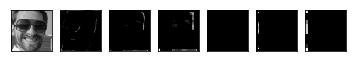

In [ ]:
inc_visualize_data(vgg_test_data, vgg19_model, num_images=1, layers=7)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


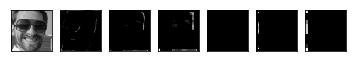

In [ ]:
visualize_data(vgg_test_data, vgg19_model, num_images=1, layers=7)

## NasNetMobile



In [ ]:
from keras.applications.nasnet import NASNetMobile 

nasNetMobile_model = NASNetMobile(input_shape=(48,48,1), include_top=True, weights=None, pooling=None, classes=6,)
nasNetMobile_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
nasNetMobile_model.fit(train_data, epochs=10)

# evaluate on test set
nasNetMobile_model.evaluate(test_data, batch_size=64)
visualize_data(test_data, nasNetMobile_model, num_images=1, layers=7)


In [ ]:
# NasNetMobile with increased epochs = 15
from keras.applications.nasnet import NASNetMobile 

nasNetMobile_model_2 = NASNetMobile(input_shape=(48,48,1), include_top=True, weights=None, pooling=None, classes=6,)
nasNetMobile_model_2.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
nasNetMobile_model_2.fit(train_data, epochs=15)

# evaluate on test set
nasNetMobile_model_2.evaluate(test_data, batch_size=64)

In [ ]:
# NasNetMobile - learning rate = 1
from keras.applications.nasnet import NASNetMobile 

nasNetMobile_model_3 = NASNetMobile(input_shape=(48,48,1), include_top=True, weights=None, pooling=None, classes=6,)
nasNetMobile_model_3.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
nasNetMobile_model_3.fit(train_data, epochs=10)

# evaluate on test set
nasNetMobile_model_3.evaluate(test_data, batch_size=64)

In [ ]:
# NasNetMobile optimizer = SGD
from keras.applications.nasnet import NASNetMobile 

nasNetMobile_model_4 = NASNetMobile(input_shape=(48,48,1), include_top=True, weights=None, pooling=None, classes=6,)
nasNetMobile_model_4.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
nasNetMobile_model_4.fit(train_data, epochs=10)

# evaluate on test set
nasNetMobile_model_4.evaluate(test_data, batch_size=64)

In [ ]:
# NasNetMobile optimizer = ADAM
from keras.applications.nasnet import NASNetMobile 

nasNetMobile_model_5 = NASNetMobile(input_shape=(48,48,1), include_top=True, weights=None, pooling=None, classes=6,)
nasNetMobile_model_5.compile(optimizer = tf.keras.optimizers.ADAM(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])
nasNetMobile_model_5.fit(train_data, epochs=10)

# evaluate on test set
nasNetMobile_model_5.evaluate(test_data, batch_size=64)